## Location analysis to open a Bistro & Wine Bar in the City of Boston

#### A group of investors is interested in opening a Bistrô & Wine Bar in the City of Boston, and is needing a thorough location analysis before moving ahead with other important business considerations. 

### Table of Contents

1. Acquire and explore Datasets
2. Search and explore city neighborhoods with the Foursquare API
3. Map neighborhoods using Folium 
4. Analize results 

### Import all necessary libraries 

In [2]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np 

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # transform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

import requests
import urllib.request
from bs4 import BeautifulSoup

from pandas.io.html import read_html 

print('Libraries imported.')

Libraries imported.


### 1. Acquire and explore datasets


#### The City of Boston, State of Massachussets, has a total of 22 neighborhoods as defined by the City's Office of Neighborhood Services.

The datasets containing the neighborhood names, postal ZIP codes and geo coordinates will be acquired from public websites 




Data sources:

https://data.boston.gov/

https://datausa.io/profile/geo/boston-ma/

https://www.findlatitudeandlongitude.com/

https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/?



#### Get the City of Boston zip codes

Database made available by ANALYZE BOSTON data.boston.gov in different formats including geojson and csv. 

### Load and explore the data

In [3]:
file_path = '/Users/King/Desktop/IBM_DS_Capstone/Boston_zip_neighborhood.csv'
boston_zip = pd.read_csv(file_path)

### Transform the data into a pandas dataframe

In [4]:
boston_zip.head()

,ZIP Code,Neighborhood
0,2134,Allston
1,2115,Back Bay
2,2116,Bay Village
3,2114,"Beacon Hill, West End"
4,2135,Brighton


Sort the dataframe by ZIP code

In [5]:
boston_zip.sort_values(by = 'ZIP Code', ascending = True, inplace = True)

In [6]:
boston_zip.head()

,ZIP Code,Neighborhood
8,2110,Downtown
6,2111,"Chinatown, Leather District"
16,2113,North End
3,2114,"Beacon Hill, West End"
1,2115,Back Bay


In [7]:
# reset the index
boston_zip = boston_zip.reset_index(drop=True)

In [8]:
# check for duplicates in ZIP Code column
duplicates = boston_zip[boston_zip.duplicated(['ZIP Code'])]
noduplicates = duplicates.empty


In [9]:
if noduplicates == True :
    print('No ZIP Code duplicates')
else :
    print("Duplicate ZIP Codes: ", duplicates, sep='\n')
    # execute code to combine two neighborhoods into one row with the neighborhood names separated with a comma
    # use GROUPBY and AGG to group duplicate postal codes and combine the respective Neighborhood names separated by comma
    # postal_data.groupby('Postal Code')['Neighborhood'].agg(','.join)
    boston_zip.groupby('ZIP Code')['Neighborhood'].agg(','.join)

No ZIP Code duplicates


In [10]:
# Inspect the resulting dataframe
boston_zip.head()

,ZIP Code,Neighborhood
0,2110,Downtown
1,2111,"Chinatown, Leather District"
2,2113,North End
3,2114,"Beacon Hill, West End"
4,2115,Back Bay


In [11]:
# create three lists to store table data
bostonZipList = []
LatList = []
LongList = []

In [12]:
# Zip code coordinates 
url_1 = 'https://public.opendatasoft.com/explore/embed/dataset/us-zip-code-latitude-and-longitude/table/?refine.state=MA&q=Boston'

#### Acquire dataset containing Boston postal codes and neighborhood coordinates 

In [13]:
file_path = '/Users/King/Desktop/IBM_DS_Capstone/Week_4/Boston/Boston_zip_nbh_latlong.csv'
boston_zip_coord = pd.read_csv(file_path)

In [14]:
boston_zip_coord.head()

,ZIP,Nborhood,Unnamed: 2,Lat,Long,Unnamed: 5,Unnamed: 6
0,2134,Allston,NaN,42.358162,-71.054065,NaN,NaN
1,2115,Back Bay,NaN,42.350274,-71.058768,NaN,NaN
2,2116,Bay Village,NaN,42.365161,-71.055472,NaN,NaN
3,2114,Beacon Hill / West End,NaN,42.362250,-71.067337,NaN,NaN
4,2135,Brighton,NaN,42.342124,-71.096672,NaN,NaN


In [15]:
boston_zip_coord.sort_values(by = 'ZIP', ascending = True, inplace = True)

In [16]:
# drop Unnamed columns
boston_zip_coord.drop(boston_zip_coord.columns[boston_zip_coord.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [17]:
boston_zip_coord.head()

,ZIP,Nborhood,Lat,Long
8,2110,Downtown,42.307319,-71.085935
6,2111,Chinatown / Leather District,42.337030,-71.072034
16,2113,North End,42.283214,-71.127027
3,2114,Beacon Hill / West End,42.362250,-71.067337
1,2115,Back Bay,42.350274,-71.058768


In [18]:
# reset the index
boston_zip_coord = boston_zip_coord.reset_index(drop=True)

#### Check ZIP Code duplicates and drop cells with neighborhoods not assigned

In [19]:
# check for duplicates in ZIP Code column
duplicates_2 = boston_zip_coord[boston_zip_coord.duplicated(['ZIP'])]
noduplicates = duplicates_2.empty

In [20]:
if noduplicates == True :
    print('No ZIP Code duplicates')
else :
    print("Duplicate ZIP Codes: ", duplicates, sep='\n')
    # execute code to combine two neighborhoods into one row with the neighborhood names separated with a comma
    # use GROUPBY and AGG to group duplicate postal codes and combine the respective Neighborhood names separated by comma
    # postal_data.groupby('Postal Code')['Neighborhood'].agg(','.join)
    boston_zip.groupby('ZIP Code')['Neighborhood'].agg(','.join)

No ZIP Code duplicates


In [21]:
boston_df = pd.concat((boston_zip,boston_zip_coord), axis = 1)

In [22]:
# Inspect the resulting concatenated dataframes - ensure ZIP from both dataframes match
boston_df

,ZIP Code,Neighborhood,ZIP,Nborhood,Lat,Long
0,2110,Downtown,2110,Downtown,42.307319,-71.085935
1,2111,"Chinatown, Leather District",2111,Chinatown / Leather District,42.337030,-71.072034
2,2113,North End,2113,North End,42.283214,-71.127027
3,2114,"Beacon Hill, West End",2114,Beacon Hill / West End,42.362250,-71.067337
4,2115,Back Bay,2115,Back Bay,42.350274,-71.058768
5,2116,Bay Village,2116,Bay Village,42.365161,-71.055472
6,2118,South End,2118,South End,42.252918,-71.129278
7,2120,Mission Hill,2120,Mission Hill,42.309820,-71.120330
8,2121,Roxbury,2121,Roxbury,42.348371,-71.134572
9,2124,Mid Dorchester,2124,Mid Dorchester,42.377875,-71.061996


In [24]:
# drop the "ZIP" and "Nborhood" columns that came with the coordinate dataframe, used for visual check after the concatenation 
boston_df.drop(boston_df.columns[[2,3]], axis = 1).head()

,ZIP Code,Neighborhood,Lat,Long
0,2110,Downtown,42.307319,-71.085935
1,2111,"Chinatown, Leather District",42.337030,-71.072034
2,2113,North End,42.283214,-71.127027
3,2114,"Beacon Hill, West End",42.362250,-71.067337
4,2115,Back Bay,42.350274,-71.058768


### FOURSQUARE   - Search and Explore venues and categories

#### Initialize client parameters

In [25]:
CLIENT_ID = '35FMOP0JLXCMJ5S240W5PNG05FI1PRSUKUADN24FEAKGADTD' # my Foursquare ID
CLIENT_SECRET = 'VKKRYNNHQ1DUNZQOQOUW11LLXAZLQNAWRES4FWXQJUXDGQKE' # my Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: 35FMOP0JLXCMJ5S240W5PNG05FI1PRSUKUADN24FEAKGADTD
CLIENT_SECRET:VKKRYNNHQ1DUNZQOQOUW11LLXAZLQNAWRES4FWXQJUXDGQKE


### 1. Search for a specific venue category
> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**

#### Use the Sheraton Boston Hotel at Back Bay as a reference point 

In [26]:
# Sheraton Boston Hotel address = '39 Dalton St, Boston, MA 02199'
address = '39 Dalton St, Boston, MA 02199'
# acquire the geo coordinates of the Sheraton Boston Hotel 
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Sheraton Boston Hotel coordinates ', 'Lat: ',latitude, '  Long: ',longitude)

Sheraton Boston Hotel coordinates  Lat:  42.3467642   Long:  -71.0836627


#### Search for a specific venue category within a given radius of the selected location

In [27]:
search_query = 'wine bar'
radius = 1000 # expressed in meters of the specified location
print('Search category: ',search_query)

Search category:  wine bar


In [28]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=35FMOP0JLXCMJ5S240W5PNG05FI1PRSUKUADN24FEAKGADTD&client_secret=VKKRYNNHQ1DUNZQOQOUW11LLXAZLQNAWRES4FWXQJUXDGQKE&ll=42.3467642,-71.0836627&v=20180604&query=wine bar&radius=1000&limit=30'

In [29]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f11f3c358c1981045ea7596'},
 'response': {'venues': [{'id': '546cfcc8498e75b35e1f1f58',
    'name': 'Barcelona Wine Bar',
    'location': {'address': '525 Tremont St',
     'lat': 42.34462191219444,
     'lng': -71.07091889814757,
     'labeledLatLngs': [{'label': 'display',
       'lat': 42.34462191219444,
       'lng': -71.07091889814757}],
     'distance': 1075,
     'postalCode': '02116',
     'cc': 'US',
     'city': 'Boston',
     'state': 'MA',
     'country': 'United States',
     'formattedAddress': ['525 Tremont St',
      'Boston, MA 02116',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d123941735',
      'name': 'Wine Bar',
      'pluralName': 'Wine Bars',
      'shortName': 'Wine Bar',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/winery_',
       'suffix': '.png'},
      'primary': True}],
    'venuePage': {'id': '106195845'},
    'referralId': 'v-1595012066',
    'hasPerk': False},
   {'id':

#### Get relevant part of JSON and transform it into a pandas dataframe

In [30]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# transform venues into a dataframe
dataframe = pd.json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.crossStreet,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.neighborhood
0,546cfcc8498e75b35e1f1f58,Barcelona Wine Bar,"[{'id': '4bf58dd8d48988d123941735', 'name': 'W...",v-1595012066,False,525 Tremont St,42.344622,-71.070919,"[{'label': 'display', 'lat': 42.34462191219444...",1075,02116,US,Boston,MA,United States,"[525 Tremont St, Boston, MA 02116, United States]",106195845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5b4fa8a2cf72a0002c86ac23,Jaho Coffee Roaster & Wine Bar,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1595012066,False,116 Huntington Ave,42.347077,-71.079997,"[{'label': 'display', 'lat': 42.34707662080898...",303,02116,US,Boston,MA,United States,"[116 Huntington Ave (Harcourt Street), Boston,...",NaN,Harcourt Street,2045068,https://www.grubhub.com/restaurant/jaho-coffee...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN
2,4a917cf2f964a520631a20e3,Piattini Wine Cafe,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1595012066,False,226-228 Newbury St,42.349857,-71.081315,"[{'label': 'display', 'lat': 42.34985731035594...",394,02116,US,Boston,MA,United States,"[226-228 Newbury St (btwn Exeter & Fairfield),...",41365062,btwn Exeter & Fairfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,523f148b498e6fb7148fbf39,Side Bar Grille,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1595012066,False,39 Dalton St,42.346573,-71.083847,"[{'label': 'display', 'lat': 42.34657287597656...",26,02199,US,Boston,MA,United States,"[39 Dalton St, Boston, MA 02199, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4b4cb3bbf964a520deba26e3,The Wine Emporium,"[{'id': '4bf58dd8d48988d119951735', 'name': 'W...",v-1595012066,False,607 Tremont St,42.342933,-71.073737,"[{'label': 'display', 'lat': 42.34293345880106...",921,02118,US,Boston,MA,United States,"[607 Tremont St, Boston, MA 02118, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,Barcelona Wine Bar,Wine Bar,525 Tremont St,42.344622,-71.070919,"[{'label': 'display', 'lat': 42.34462191219444...",1075,02116,US,Boston,MA,United States,"[525 Tremont St, Boston, MA 02116, United States]",NaN,NaN,546cfcc8498e75b35e1f1f58
1,Jaho Coffee Roaster & Wine Bar,Coffee Shop,116 Huntington Ave,42.347077,-71.079997,"[{'label': 'display', 'lat': 42.34707662080898...",303,02116,US,Boston,MA,United States,"[116 Huntington Ave (Harcourt Street), Boston,...",Harcourt Street,NaN,5b4fa8a2cf72a0002c86ac23
2,Piattini Wine Cafe,Italian Restaurant,226-228 Newbury St,42.349857,-71.081315,"[{'label': 'display', 'lat': 42.34985731035594...",394,02116,US,Boston,MA,United States,"[226-228 Newbury St (btwn Exeter & Fairfield),...",btwn Exeter & Fairfield,NaN,4a917cf2f964a520631a20e3
3,Side Bar Grille,Restaurant,39 Dalton St,42.346573,-71.083847,"[{'label': 'display', 'lat': 42.34657287597656...",26,02199,US,Boston,MA,United States,"[39 Dalton St, Boston, MA 02199, United States]",NaN,NaN,523f148b498e6fb7148fbf39
4,The Wine Emporium,Wine Shop,607 Tremont St,42.342933,-71.073737,"[{'label': 'display', 'lat': 42.34293345880106...",921,02118,US,Boston,MA,United States,"[607 Tremont St, Boston, MA 02118, United States]",NaN,NaN,4b4cb3bbf964a520deba26e3
5,Crazy Dough's Pizza-Artisan Slice Bar,Pizza Place,800 Boylston St,42.346363,-71.082405,"[{'label': 'display', 'lat': 42.34636264567260...",112,02199,US,Boston,MA,United States,"[800 Boylston St, Boston, MA 02199, United Sta...",NaN,NaN,5275890611d240e4eb092bc5
6,Polenta Bar Pop-Up at La Rosticceria,Italian Restaurant,800 Boylston St,42.347802,-71.082870,"[{'label': 'display', 'lat': 42.347802, 'lng':...",132,02199,US,Boston,MA,United States,"[800 Boylston St, Boston, MA 02199, United Sta...",NaN,NaN,5abfc0566dcf04182a0c00d2
7,Forty Dalton Bar,Hotel Bar,40 Dalton St,42.346466,-71.084892,"[{'label': 'display', 'lat': 42.34646621967359...",106,02115,US,Boston,MA,United States,"[40 Dalton St (at Scotia St), Boston, MA 02115...",at Scotia St,NaN,4bd114069854d13a9521f94d
8,Joe's American Bar & Grill,American Restaurant,181 Newbury St,42.350368,-71.079741,"[{'label': 'display', 'lat': 42.35036776040866...",514,02116,US,Boston,MA,United States,"[181 Newbury St (btwn Dartmouth & Exeter), Bos...",btwn Dartmouth & Exeter,NaN,3fd66200f964a5202fec1ee3
9,Genius Bar,Electronics Store,815 Boylston St Fl 3,42.348559,-71.082179,"[{'label': 'display', 'lat': 42.34855920372588...",234,02116,US,Boston,MA,United States,"[815 Boylston St Fl 3, Boston, MA 02116, Unite...",NaN,NaN,4e502cf31495fc2ca40a485c


In [32]:
dataframe_filtered.name

0                        Barcelona Wine Bar
1            Jaho Coffee Roaster & Wine Bar
2                        Piattini Wine Cafe
3                           Side Bar Grille
4                         The Wine Emporium
5     Crazy Dough's Pizza-Artisan Slice Bar
6      Polenta Bar Pop-Up at La Rosticceria
7                          Forty Dalton Bar
8                Joe's American Bar & Grill
9                                Genius Bar
10                         SideBar & Grille
11                        The Wine Emporium
12                   Pour House Bar & Grill
13                       Sheraton Shame Bar
14                        SELECT Oyster Bar
15                      Earls Kitchen + Bar
16                            Eataly Boston
17                               Bar Boulud
18                  Bauer Wines And Spirits
19                       Clarendon Wine Co.
20                   Harvard Club Grill Bar
21                           WFM Coffee Bar
22                   The Paint B

In [33]:
sheraton_df = dataframe_filtered

#### Review filtered list and eliminate non-related entries  
The Foursquare API returned list has a few non-related entries that should be removed. The words "wine" and "bar" in the search query retrieved venues such 
the Genius Bar, and it is the name used by the Apple for its tech support station located inside Apple's retail stores. Other cases include Barnes & Noble, wine retail stores, barber shop, gym and a building with 'Bar' in its name. 


In [34]:
drop_list = [4,5,6,9,11,18,19,20,21,22,26,27,28,29]
rows = sheraton_df.iloc[drop_list]
rows # review drop_list to confirm deletion

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
4,The Wine Emporium,Wine Shop,607 Tremont St,42.342933,-71.073737,"[{'label': 'display', 'lat': 42.34293345880106...",921,02118,US,Boston,MA,United States,"[607 Tremont St, Boston, MA 02118, United States]",NaN,NaN,4b4cb3bbf964a520deba26e3
5,Crazy Dough's Pizza-Artisan Slice Bar,Pizza Place,800 Boylston St,42.346363,-71.082405,"[{'label': 'display', 'lat': 42.34636264567260...",112,02199,US,Boston,MA,United States,"[800 Boylston St, Boston, MA 02199, United Sta...",NaN,NaN,5275890611d240e4eb092bc5
6,Polenta Bar Pop-Up at La Rosticceria,Italian Restaurant,800 Boylston St,42.347802,-71.082870,"[{'label': 'display', 'lat': 42.347802, 'lng':...",132,02199,US,Boston,MA,United States,"[800 Boylston St, Boston, MA 02199, United Sta...",NaN,NaN,5abfc0566dcf04182a0c00d2
9,Genius Bar,Electronics Store,815 Boylston St Fl 3,42.348559,-71.082179,"[{'label': 'display', 'lat': 42.34855920372588...",234,02116,US,Boston,MA,United States,"[815 Boylston St Fl 3, Boston, MA 02116, Unite...",NaN,NaN,4e502cf31495fc2ca40a485c
11,The Wine Emporium,Wine Shop,474 Columbus Ave,42.343208,-71.078491,"[{'label': 'display', 'lat': 42.34320784282418...",581,02118,US,Boston,MA,United States,"[474 Columbus Ave (West Newton Street), Boston...",West Newton Street,NaN,4aaee225f964a520a76320e3
18,Bauer Wines And Spirits,Wine Shop,330 Newbury St,42.348483,-71.086330,"[{'label': 'display', 'lat': 42.34848278656066...",291,02115,US,Boston,MA,United States,"[330 Newbury St (btwn Hereford & Mass Ave), Bo...",btwn Hereford & Mass Ave,NaN,4ada2c07f964a5207c1f21e3
19,Clarendon Wine Co.,Wine Shop,563 Boylston St,42.350410,-71.076160,"[{'label': 'display', 'lat': 42.35041, 'lng': ...",738,02116,US,Boston,MA,United States,"[563 Boylston St (btwn Clarendon & Dartmouth),...",btwn Clarendon & Dartmouth,NaN,4ac544a3f964a52045b120e3
20,Harvard Club Grill Bar,American Restaurant,NaN,42.348633,-71.089118,"[{'label': 'display', 'lat': 42.34863313771201...",494,NaN,US,Boston,MA,United States,"[Boston, MA, United States]",NaN,NaN,51437b97e4b09f7de16ca0c0
21,WFM Coffee Bar,Coffee Shop,15 Westland Ave,42.343430,-71.086720,"[{'label': 'display', 'lat': 42.34343, 'lng': ...",448,02115,US,Boston,MA,United States,"[15 Westland Ave, Boston, MA 02115, United Sta...",NaN,NaN,58a5d1cd0393cc24475567c0
22,The Paint Bar (Boston),Art Gallery,248 Newbury St,42.349493,-71.082585,"[{'label': 'display', 'lat': 42.34949329430807...",316,02116,US,Boston,MA,United States,"[248 Newbury St (Fairfield and Gloucester), Bo...",Fairfield and Gloucester,NaN,51573ee7e4b03e8de94be443


In [35]:
sheraton_df = sheraton_df.drop(drop_list, axis = 0)


In [37]:
# simplify dataframe for better visualization
sheraton_df[['name','categories','address','distance','lat','lng']].reset_index(drop=True)

,name,categories,address,distance,lat,lng
0,Barcelona Wine Bar,Wine Bar,525 Tremont St,1075,42.344622,-71.070919
1,Jaho Coffee Roaster & Wine Bar,Coffee Shop,116 Huntington Ave,303,42.347077,-71.079997
2,Piattini Wine Cafe,Italian Restaurant,226-228 Newbury St,394,42.349857,-71.081315
3,Side Bar Grille,Restaurant,39 Dalton St,26,42.346573,-71.083847
4,Forty Dalton Bar,Hotel Bar,40 Dalton St,106,42.346466,-71.084892
5,Joe's American Bar & Grill,American Restaurant,181 Newbury St,514,42.350368,-71.079741
6,SideBar & Grille,Bar,39 Dalton St,72,42.346269,-71.084227
7,Pour House Bar & Grill,Bar,907 Boylston St,162,42.348197,-71.084051
8,Sheraton Shame Bar,Cocktail Bar,NaN,86,42.346166,-71.084326
9,SELECT Oyster Bar,Seafood Restaurant,50 Gloucester St,197,42.348526,-71.083931


In [38]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Sheraton Boston Hotel
# add a red circle marker to represent the Sheraton Boston Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Sheraton Boston',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the returned bar category as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [39]:
sheraton_df.groupby(['categories']).count()


,name,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
categories,,,,,,,,,,,,,,,
American Restaurant,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3
Bar,3,3,3,3,3,3,3,3,3,3,3,3,2,0,3
Cocktail Bar,1,0,1,1,1,1,0,1,1,1,1,1,0,0,1
Coffee Shop,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
French Restaurant,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
Gourmet Shop,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
Hotel Bar,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
Italian Restaurant,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
Restaurant,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1


In [40]:
sum_cat = sheraton_df.groupby(['categories']).count()

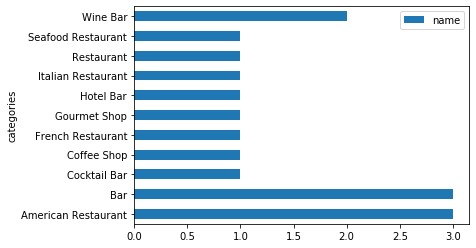

In [41]:
ax = sum_cat.plot.barh( y='name', rot=0)

### Explore given venue

In [42]:
venue_id = '5d5ed85789c8cd00084caa6f' # ID of Cello Bar 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/5d5ed85789c8cd00084caa6f?client_id=35FMOP0JLXCMJ5S240W5PNG05FI1PRSUKUADN24FEAKGADTD&client_secret=VKKRYNNHQ1DUNZQOQOUW11LLXAZLQNAWRES4FWXQJUXDGQKE&v=20180604'

In [43]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'price', 'likes', 'dislike', 'ok', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'seasonalHours', 'pageUpdates', 'inbox', 'parent', 'hierarchy', 'attributes'])


{'id': '5d5ed85789c8cd00084caa6f',
 'name': 'Cello Bar',
 'contact': {},
 'location': {'lat': 42.347759,
  'lng': -71.082525,
  'labeledLatLngs': [{'label': 'display',
    'lat': 42.347759,
    'lng': -71.082525}],
  'postalCode': '02199',
  'cc': 'US',
  'city': 'Boston',
  'state': 'MA',
  'country': 'United States',
  'formattedAddress': ['Boston, MA 02199', 'United States']},
 'canonicalUrl': 'https://foursquare.com/v/cello-bar/5d5ed85789c8cd00084caa6f',
 'categories': [{'id': '4bf58dd8d48988d123941735',
   'name': 'Wine Bar',
   'pluralName': 'Wine Bars',
   'shortName': 'Wine Bar',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/winery_',
    'suffix': '.png'},
   'primary': True}],
 'verified': False,
 'stats': {'tipCount': 0},
 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'},
 'likes': {'count': 0, 'groups': []},
 'dislike': False,
 'ok': False,
 'allowMenuUrlEdit': True,
 'beenHere': {'count': 0,
  'unconfirmedCount': 0,
  'marked': False,
  'la

In [44]:
try:
    print('The rating for this venue is: ',result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [45]:
#print('The rating for this venue is: ',result['response']['venue']['rating'])
print('Total tips for this venue is: ',result['response']['venue']['tips']['count'])

Total tips for this venue is:  0


In [46]:
venue_id = '5410e67c498e777b79eb81df' # ID of Bar Boulud
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print('The rating for this venue is: ',result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

The rating for this venue is:  6.3


In [47]:
print('Total tips for this venue is: ',result['response']['venue']['tips']['count'])

Total tips for this venue is:  26


### Reference point # 2 

### Boston Marriott Long Wharf  at the Waterfront 

In [48]:
#  Boston Marriott Long Wharf  address = '296 State St, Boston, MA 02109'

address = '296 State St, Boston, MA 02109'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Boston Marriott Long Wharf coordinates ', 'Lat: ',latitude, '  Long: ',longitude)

Boston Marriott Long Wharf coordinates  Lat:  42.35965204166667   Long:  -71.05107704166666


In [49]:
search_query = 'wine bar'
radius = 1000
print(search_query)

wine bar


In [50]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=35FMOP0JLXCMJ5S240W5PNG05FI1PRSUKUADN24FEAKGADTD&client_secret=VKKRYNNHQ1DUNZQOQOUW11LLXAZLQNAWRES4FWXQJUXDGQKE&ll=42.35965204166667,-71.05107704166666&v=20180604&query=wine bar&radius=1000&limit=30'

In [51]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f11f5d5a764ea02247c767d'},
 'response': {'venues': [{'id': '3fd66200f964a52066ec1ee3',
    'name': 'Les Zygomates Wine Bar Bistro',
    'location': {'address': '129 South St',
     'crossStreet': 'at Tufts St',
     'lat': 42.351253697441585,
     'lng': -71.0573443164337,
     'labeledLatLngs': [{'label': 'display',
       'lat': 42.351253697441585,
       'lng': -71.0573443164337}],
     'distance': 1067,
     'postalCode': '02111',
     'cc': 'US',
     'neighborhood': 'Downtown Boston',
     'city': 'Boston',
     'state': 'MA',
     'country': 'United States',
     'formattedAddress': ['129 South St (at Tufts St)',
      'Boston, MA 02111',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d123941735',
      'name': 'Wine Bar',
      'pluralName': 'Wine Bars',
      'shortName': 'Wine Bar',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/winery_',
       'suffix': '.png'},
      'primary': True}],
    'ven

In [52]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# transform venues into a dataframe
dataframe = pd.json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.neighborhood,location.city,location.state,location.country,location.formattedAddress,venuePage.id,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name
0,3fd66200f964a52066ec1ee3,Les Zygomates Wine Bar Bistro,"[{'id': '4bf58dd8d48988d123941735', 'name': 'W...",v-1595012678,False,129 South St,at Tufts St,42.351254,-71.057344,"[{'label': 'display', 'lat': 42.35125369744158...",1067,02111,US,Downtown Boston,Boston,MA,United States,"[129 South St (at Tufts St), Boston, MA 02111,...",92775147,NaN,NaN,NaN,NaN,NaN,NaN
1,50e24b28e4b0869e6b9edbd0,Sarah’s Rooftop Wine Bar,"[{'id': '4bf58dd8d48988d123941735', 'name': 'W...",v-1595012678,False,414 Hanover St,NaN,42.366367,-71.052933,"[{'label': 'display', 'lat': 42.36636734008789...",762,02113,US,NaN,Boston,MA,United States,"[414 Hanover St, Boston, MA 02113, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5d153bbfd5d77a0023306fc3,The Wine Bike Pop Up Wine Bar,"[{'id': '4bf58dd8d48988d123941735', 'name': 'W...",v-1595012678,False,125 Summer St,NaN,42.353051,-71.057487,"[{'label': 'display', 'lat': 42.353051, 'lng':...",904,02110,US,NaN,Boston,MA,United States,"[125 Summer St, Boston, MA 02110, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,59a5e75dc0f16369870a9a50,Taste Wine Bar & Cafe,"[{'id': '4bf58dd8d48988d123941735', 'name': 'W...",v-1595012678,False,NaN,NaN,42.353578,-71.057971,"[{'label': 'display', 'lat': 42.3535779761968,...",882,02110,US,NaN,Boston,MA,United States,"[Boston, MA 02110, United States]",NaN,1320865,https://www.grubhub.com/restaurant/taste-wine-...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png
4,5079f086e4b00760cb3df051,Custom House Bar,"[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",v-1595012678,False,NaN,NaN,42.359791,-71.051529,"[{'label': 'display', 'lat': 42.35979080200195...",40,02110,US,NaN,Boston,MA,United States,"[Boston, MA 02110, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,id
0,Les Zygomates Wine Bar Bistro,Wine Bar,129 South St,at Tufts St,42.351254,-71.057344,"[{'label': 'display', 'lat': 42.35125369744158...",1067,02111,US,Downtown Boston,Boston,MA,United States,"[129 South St (at Tufts St), Boston, MA 02111,...",3fd66200f964a52066ec1ee3
1,Sarah’s Rooftop Wine Bar,Wine Bar,414 Hanover St,NaN,42.366367,-71.052933,"[{'label': 'display', 'lat': 42.36636734008789...",762,02113,US,NaN,Boston,MA,United States,"[414 Hanover St, Boston, MA 02113, United States]",50e24b28e4b0869e6b9edbd0
2,The Wine Bike Pop Up Wine Bar,Wine Bar,125 Summer St,NaN,42.353051,-71.057487,"[{'label': 'display', 'lat': 42.353051, 'lng':...",904,02110,US,NaN,Boston,MA,United States,"[125 Summer St, Boston, MA 02110, United States]",5d153bbfd5d77a0023306fc3
3,Taste Wine Bar & Cafe,Wine Bar,NaN,NaN,42.353578,-71.057971,"[{'label': 'display', 'lat': 42.3535779761968,...",882,02110,US,NaN,Boston,MA,United States,"[Boston, MA 02110, United States]",59a5e75dc0f16369870a9a50
4,Custom House Bar,Bar,NaN,NaN,42.359791,-71.051529,"[{'label': 'display', 'lat': 42.35979080200195...",40,02110,US,NaN,Boston,MA,United States,"[Boston, MA 02110, United States]",5079f086e4b00760cb3df051
5,Joe's American Bar And Grill,American Restaurant,100 Atlantic Ave,at Long Wharf,42.361916,-71.050861,"[{'label': 'display', 'lat': 42.36191622897905...",252,02110,US,Waterfront,Boston,MA,United States,"[100 Atlantic Ave (at Long Wharf), Boston, MA ...",4a8f3539f964a520681420e3
6,Warehouse Bar & Grill,American Restaurant,40 Broad Street,Milk Street,42.358193,-71.054111,"[{'label': 'display', 'lat': 42.35819339810570...",297,02109,US,NaN,Boston,MA,United States,"[40 Broad Street (Milk Street), Boston, MA 021...",50b94242d63e12aa511cf961
7,Wine Bottega,Wine Shop,341 Hanover St,btwn Fleet & Prince,42.364529,-71.053753,"[{'label': 'display', 'lat': 42.36452899095869...",585,02113,US,NaN,Boston,MA,United States,"[341 Hanover St (btwn Fleet & Prince), Boston,...",4b2034dbf964a520ac2e24e3
8,The Wine Cave,None,75 Canal St,btwn Market & Valenti,42.364086,-71.059373,"[{'label': 'display', 'lat': 42.364086, 'lng':...",842,02114,US,NaN,Boston,MA,United States,"[75 Canal St (btwn Market & Valenti), Boston, ...",4b43c810f964a520b2e925e3
9,Battery Park Bar & Lounge,Sports Bar,33 Batterymarch St,btwn Franklin & Milk,42.357566,-71.053901,"[{'label': 'display', 'lat': 42.35756584041581...",328,02110,US,NaN,Boston,MA,United States,"[33 Batterymarch St (btwn Franklin & Milk), Bo...",4c9394dcf7cfa1cdc3aaab15


In [54]:
dataframe_filtered.name

0                       Les Zygomates Wine Bar Bistro
1                            Sarah’s Rooftop Wine Bar
2                       The Wine Bike Pop Up Wine Bar
3                               Taste Wine Bar & Cafe
4                                    Custom House Bar
5                        Joe's American Bar And Grill
6                               Warehouse Bar & Grill
7                                        Wine Bottega
8                                       The Wine Cave
9                           Battery Park Bar & Lounge
10                                    Boost Juice Bar
11                     Salty Dog Seafood Grille & Bar
12    Rabia's Seafood/Oyster Bar & Italian Restaurant
13                            Side Bar Food & Spirits
14                 Hill Holliday HHappy HHour Keg Bar
15           Pulcinella Mozzarella Bar and Restaurant
16               Massachusetts Board of Bar Overseers
17                                            Wet Bar
18                          

### drop non relevant entries

In [56]:
waterfront_df = dataframe_filtered

In [57]:
drop_list = [2,4,7,8,9,10,11,12,14,16,17,19,26,28,29]
rows = waterfront_df.iloc[drop_list]
rows # review drop_list to confirm deletion 

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,id
2,The Wine Bike Pop Up Wine Bar,Wine Bar,125 Summer St,NaN,42.353051,-71.057487,"[{'label': 'display', 'lat': 42.353051, 'lng':...",904,02110,US,NaN,Boston,MA,United States,"[125 Summer St, Boston, MA 02110, United States]",5d153bbfd5d77a0023306fc3
4,Custom House Bar,Bar,NaN,NaN,42.359791,-71.051529,"[{'label': 'display', 'lat': 42.35979080200195...",40,02110,US,NaN,Boston,MA,United States,"[Boston, MA 02110, United States]",5079f086e4b00760cb3df051
7,Wine Bottega,Wine Shop,341 Hanover St,btwn Fleet & Prince,42.364529,-71.053753,"[{'label': 'display', 'lat': 42.36452899095869...",585,02113,US,NaN,Boston,MA,United States,"[341 Hanover St (btwn Fleet & Prince), Boston,...",4b2034dbf964a520ac2e24e3
8,The Wine Cave,None,75 Canal St,btwn Market & Valenti,42.364086,-71.059373,"[{'label': 'display', 'lat': 42.364086, 'lng':...",842,02114,US,NaN,Boston,MA,United States,"[75 Canal St (btwn Market & Valenti), Boston, ...",4b43c810f964a520b2e925e3
9,Battery Park Bar & Lounge,Sports Bar,33 Batterymarch St,btwn Franklin & Milk,42.357566,-71.053901,"[{'label': 'display', 'lat': 42.35756584041581...",328,02110,US,NaN,Boston,MA,United States,"[33 Batterymarch St (btwn Franklin & Milk), Bo...",4c9394dcf7cfa1cdc3aaab15
10,Boost Juice Bar,Juice Bar,12 Broad St.,NaN,42.358730,-71.054254,"[{'label': 'display', 'lat': 42.35872975853978...",280,02554,US,NaN,Boston,MA,United States,"[12 Broad St., Boston, MA 02554, United States]",4a82c52ff964a52052f91fe3
11,Salty Dog Seafood Grille & Bar,Seafood Restaurant,206 Faneuil Hall Market Pl,NaN,42.359937,-71.055677,"[{'label': 'display', 'lat': 42.35993714563105...",379,02109,US,NaN,Boston,MA,United States,"[206 Faneuil Hall Market Pl, Boston, MA 02109,...",40b28c80f964a520b5f71ee3
12,Rabia's Seafood/Oyster Bar & Italian Restaurant,Italian Restaurant,73 Salem St,btwn Morton St. & Stillman St.,42.363377,-71.055977,"[{'label': 'display', 'lat': 42.36337703225326...",578,02113,US,NaN,Boston,MA,United States,"[73 Salem St (btwn Morton St. & Stillman St.),...",4ad5ffd6f964a520620421e3
14,Hill Holliday HHappy HHour Keg Bar,Beer Bar,NaN,NaN,42.358540,-71.056210,"[{'label': 'display', 'lat': 42.35854, 'lng': ...",439,NaN,US,NaN,Boston,MA,United States,"[Boston, MA, United States]",576c4697498e051dbad90063
16,Massachusetts Board of Bar Overseers,Government Building,"99 High St, Boston, MA 02110",NaN,42.354267,-71.054840,"[{'label': 'display', 'lat': 42.35426712036133...",674,02110,US,NaN,Boston,MA,United States,"[99 High St, Boston, MA 02110, Boston, MA 0211...",4f2303ece4b0085e487a4e18


In [70]:
# simplify dataframe for better visualization
waterfront_df[['name','categories','address','distance','lat','lng']].reset_index(drop=True)

,name,categories,address,distance,lat,lng
0,Les Zygomates Wine Bar Bistro,Wine Bar,129 South St,1067,42.351254,-71.057344
1,Sarah’s Rooftop Wine Bar,Wine Bar,414 Hanover St,762,42.366367,-71.052933
2,Taste Wine Bar & Cafe,Wine Bar,NaN,882,42.353578,-71.057971
3,Joe's American Bar And Grill,American Restaurant,100 Atlantic Ave,252,42.361916,-71.050861
4,Warehouse Bar & Grill,American Restaurant,40 Broad Street,297,42.358193,-71.054111
5,Side Bar Food & Spirits,Bar,14 Bromfield St,798,42.356574,-71.059848
6,Pulcinella Mozzarella Bar and Restaurant,Italian Restaurant,78 Salem St,598,42.363693,-71.055872
7,Rowes Wharf Bar,Bar,70 Rowes Wharf,387,42.356224,-71.050255
8,Kingston Grille & Bar (KGB Bar),New American Restaurant,25 Kingston St,930,42.353659,-71.058965
9,Ducali Pizzeria & Bar,Pizza Place,289 Causeway St,1007,42.367086,-71.058068


In [71]:
sum_cat =  waterfront_df.groupby(['categories']).count()

In [72]:
sum_cat

,name,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,id
categories,,,,,,,,,,,,,,,
American Restaurant,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2
Bar,2,2,0,2,2,2,2,2,2,0,2,2,2,2,2
French Restaurant,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
Italian Restaurant,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1
New American Restaurant,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1
Pizza Place,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
Seafood Restaurant,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1
Sports Bar,2,2,1,2,2,2,2,2,2,0,2,2,2,2,2
Wine Bar,3,2,1,3,3,3,3,3,3,1,3,3,3,3,3


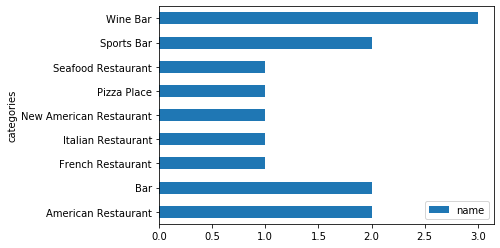

In [73]:
ax = sum_cat.plot.barh( y='name', rot=0)

#### Review filtered list and eliminate non-relevant entries

In [74]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Renaissance Boston Waterfront Hotel
# add a red circle marker to represent the Boston Marriott Long Wharf Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Marriott Long Wharf',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the returned bar category as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [ ]:
#### Explore sample venue

In [75]:
venue_id = '4ac573a4f964a52014b220e3' # ID of Tamo Bistro & Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()

try:
    print('The rating for this venue is: ',result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

The rating for this venue is:  6.8


In [76]:
print('Total tips for this venue is: ',result['response']['venue']['tips']['count'])

Total tips for this venue is:  29


In [77]:
venue_id = '3fd66200f964a52066ec1ee3' # ID of Les Zygomates
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()

try:
    print('The rating for this venue is: ',result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

The rating for this venue is:  8.4


In [78]:
print('Total tips for this venue is: ',result['response']['venue']['tips']['count'])

Total tips for this venue is:  48


### The End